In [277]:
import pandas as pd


In [278]:
data = pd.read_csv("sample.csv")

In [279]:
data.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,119237,105834,True,Wed Oct 11 06:55:44 +0000 2017,@AppleSupport causing the reply to be disregar...,119236,NaN
1,119238,ChaseSupport,False,Wed Oct 11 13:25:49 +0000 2017,@105835 Your business means a lot to us. Pleas...,NaN,119239.0
2,119239,105835,True,Wed Oct 11 13:00:09 +0000 2017,@76328 I really hope you all change but I'm su...,119238,NaN
3,119240,VirginTrains,False,Tue Oct 10 15:16:08 +0000 2017,@105836 LiveChat is online at the moment - htt...,119241,119242.0
4,119241,105836,True,Tue Oct 10 15:17:21 +0000 2017,@VirginTrains see attached error message. I've...,119243,119240.0


In [280]:
data.text[0]

'@AppleSupport causing the reply to be disregarded and the tapped notification under the keyboard is opened😡😡😡'

In [281]:
data['text'][0].lower()

'@applesupport causing the reply to be disregarded and the tapped notification under the keyboard is opened😡😡😡'

## Normalizing the text column

In [282]:
data['text'] = data['text'].str.lower()

In [283]:
text1 = data['text'][89]
text1

'they reschedule my shit for tomorrow https://t.co/rsvzct982t'

## Removing the URL in the text feature

In [284]:
# re.sub('http://\S+|https://\S+', '', t)

In [285]:
import re

In [286]:
def remove_url(text1):
    pattern=re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub("",text1)


remove_url(text1)

'they reschedule my shit for tomorrow '

# Applying the remove_url() to the data['text'] feature

In [287]:
data['text'] = data['text'].apply(remove_url)

In [288]:
data['text'][89]

'they reschedule my shit for tomorrow '

## Removing Emojis

In [289]:
text2 = data.text[0]
text2

'@applesupport causing the reply to be disregarded and the tapped notification under the keyboard is opened😡😡😡'

In [290]:
def remove_emojis_manually(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    clean_text = emoji_pattern.sub(r'', text)
    return clean_text

In [291]:
remove_emojis_manually(text2)

'@applesupport causing the reply to be disregarded and the tapped notification under the keyboard is opened'

In [292]:
data['text'] = data['text'].apply(remove_emojis_manually)

In [293]:
#data["text"].apply(lambda text: remove_emojis_manually(text))

In [294]:
data['text'][4]

"@virgintrains see attached error message. i've tried leaving a voicemail several times in the past week "

## Removing Punctuations in the data

In [295]:
import string

exclude=string.punctuation

def remove_punc(text):
    for char in exclude:
        text=text.replace(char,"")
    return text

In [296]:
data['text'] = data['text'].apply(remove_punc)

In [297]:
data['text']

0     applesupport causing the reply to be disregard...
1     105835 your business means a lot to us please ...
2     76328 i really hope you all change but im sure...
3     105836 livechat is online at the moment   or c...
4     virgintrains see attached error message ive tr...
                            ...                        
88    105860 i wish amazon had an option of where i ...
89                they reschedule my shit for tomorrow 
90    105861 hey sara sorry to hear of the issues yo...
91    tesco bit of both  finding the layout cumberso...
92    105861 if that doesnt help please dm your full...
Name: text, Length: 93, dtype: object

## Removing the stopwords

In [298]:
import nltk

In [299]:
from nltk.corpus import stopwords


In [300]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [301]:
stopwords = stopwords.words('english')

In [302]:
def removing_stopwords(text):
  new_word = []
  for word in text.split():
    if word not in stopwords:
      new_word.append(word)
  return " ".join(new_word)


In [303]:
data['text'] = data['text'].apply(removing_stopwords)

In [304]:
data['text']

0     applesupport causing reply disregarded tapped ...
1     105835 business means lot us please dm name zi...
2            76328 really hope change im sure wont dont
3     105836 livechat online moment contact 03331 03...
4     virgintrains see attached error message ive tr...
                            ...                        
88    105860 wish amazon option get shipped ups stor...
89                             reschedule shit tomorrow
90    105861 hey sara sorry hear issues ask lay spee...
91    tesco bit finding layout cumbersome removing i...
92    105861 doesnt help please dm full name address...
Name: text, Length: 93, dtype: object

## Tokenization And  Stemming

In [305]:
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [306]:
sample = data['text'][0]

In [307]:

def tok_stem(text):
  sentences = nltk.sent_tokenize(text)

  stemmer = nltk.PorterStemmer()
  # Stemming
  for i in range(len(sentences)):
    words = nltk.word_tokenize(sentences[i])
    words = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    sentences[i] = ' '.join(words)

    return sentences


In [308]:
summ = 'solving by visualization'

In [309]:
tok_stem(summ)

['solv visual']

In [310]:
data['text'] = data['text'].apply(tok_stem)

In [311]:
data['text']

0     [applesupport caus repli disregard tap notif k...
1     [105835 busi mean lot us pleas dm name zip cod...
2           [76328 realli hope chang im sure wont dont]
3     [105836 livechat onlin moment contact 03331 03...
4     [virgintrain see attach error messag ive tri l...
                            ...                        
88    [105860 wish amazon option get ship up store a...
89                            [reschedul shit tomorrow]
90    [105861 hey sara sorri hear issu ask lay speed...
91    [tesco bit find layout cumbersom remov item fa...
92    [105861 doesnt help pleas dm full name address...
Name: text, Length: 93, dtype: object

## Advantages and Disadvantages

Advantage:

1.It is fast and handles irregular plurals like ‘teeth’ and ‘tooth’ etc.

2.when you want speed in your application, go to stemming

Limitation:

1.It is time consuming and frequently fails to form words from stem.

2.It miss the semantic meaning of a word

## Tokenization And Lemmatization

In [312]:
from nltk.stem import WordNetLemmatizer

In [313]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [314]:
corpus = data['text']

In [315]:
'''
def lammatization(text):
    words=[sentence.split() for sentence in text]

    lemmetizer=WordNetLemmatizer()
    words = nltk.word_tokenize(text)

    lemetized_word=[lemmetizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]

    return lemetized_word
'''

"\ndef lammatization(text):\n    words=[sentence.split() for sentence in text]\n\n    lemmetizer=WordNetLemmatizer()\n    words = nltk.word_tokenize(text)\n\n    lemetized_word=[lemmetizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]\n    \n    return lemetized_word\n"

In [316]:
#lemmatized_corpus = corpus.apply(lammatization)

In [317]:
#lemmatized_corpus

In [318]:
'''
def tok_lemm(text):
  sentences = nltk.sent_tokenize(text)

  lemmatizer = WordNetLemmatizer()

  for i in range(len(sentences)):
    words = nltk.word_tokenize(sentences[i])
    words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    sentences[i] = ' '.join(words)

  return sentences

'''

"\ndef tok_lemm(text):\n  sentences = nltk.sent_tokenize(text)\n\n  lemmatizer = WordNetLemmatizer()\n\n  for i in range(len(sentences)):\n    words = nltk.word_tokenize(sentences[i])\n    words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]\n    sentences[i] = ' '.join(words)\n\n  return sentences\n\n"

In [319]:
#corpus = corpus.apply(tok_lemm)

In [320]:
#corpus

## Advantages

1.Lemmatization gives more context to chatbot conversations as it recognizes words based on their exact and contextual meaning.

## Disadvantages

1.On the other hand, lemmatization is a time-consuming and slow process.

2.As it extracts the root words and meaning of the words from the dictionary.

## OneHot Encoding

In [321]:
corpus = data['text']

In [322]:
corpus

0     [applesupport caus repli disregard tap notif k...
1     [105835 busi mean lot us pleas dm name zip cod...
2           [76328 realli hope chang im sure wont dont]
3     [105836 livechat onlin moment contact 03331 03...
4     [virgintrain see attach error messag ive tri l...
                            ...                        
88    [105860 wish amazon option get ship up store a...
89                            [reschedul shit tomorrow]
90    [105861 hey sara sorri hear issu ask lay speed...
91    [tesco bit find layout cumbersom remov item fa...
92    [105861 doesnt help pleas dm full name address...
Name: text, Length: 93, dtype: object

In [323]:
import numpy as np


In [324]:
unique_words = set()
for sentence in corpus:
    for word in sentence:
        unique_words.add(word.lower())

# Create a dictionary to map each
# unique word to an index
word_to_index = {}
for i, word in enumerate(unique_words):
    word_to_index[word] = i

# Create one-hot encoded vectors for
# each word in the corpus
one_hot_vectors = []
for sentence in corpus:
    sentence_vectors = []
    for word in sentence:
        vector = np.zeros(len(unique_words))
        vector[word_to_index[word.lower()]] = 1
        sentence_vectors.append(vector)
    one_hot_vectors.append(sentence_vectors)

# Print the one-hot encoded vectors
# for the first sentence
print("One-hot encoded vectors for the first sentence:")
for vector in one_hot_vectors[0]:
    print(vector)

One-hot encoded vectors for the first sentence:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [325]:
type(sentence)

list

## Advantages of OHE
1.Easy to implemrnt with python,get_dummies()
2.It's indicating whether the word is present or not.

##Disadvantages of OHE
1.Sparse Matrix--> means it has 1's and 0's more,causing overfitting problem
2.ML alg needs --->Fixed size I/P
3.No semantic meaning is getting
4.out of vocabulary

## Bag of Words(BoW)

In [326]:
data["text"] = data["text"].apply(lambda x: " ".join([word for word in x if word not in stopwords.words("english")]))

In [327]:
from sklearn.feature_extraction.text import CountVectorizer

In [328]:
BOW=CountVectorizer()

In [329]:
text_array = np.array(data["text"])

In [ ]:
document_matrix = BOW.fit_transform(data["text"])

In [331]:
document_matrix

<93x527 sparse matrix of type '<class 'numpy.int64'>'
	with 1034 stored elements in Compressed Sparse Row format>

In [332]:
BOW.vocabulary_

{'applesupport': 89,
 'caus': 127,
 'repli': 393,
 'disregard': 173,
 'tap': 463,
 'notif': 332,
 'keyboard': 273,
 'open': 343,
 '105835': 4,
 'busi': 118,
 'mean': 307,
 'lot': 300,
 'us': 497,
 'pleas': 362,
 'dm': 175,
 'name': 326,
 'zip': 526,
 'code': 139,
 'addit': 64,
 'detail': 167,
 'concern': 144,
 'rr': 399,
 '76328': 50,
 'realli': 382,
 'hope': 238,
 'chang': 129,
 'im': 248,
 'sure': 455,
 'wont': 517,
 'dont': 178,
 '105836': 5,
 'livechat': 293,
 'onlin': 341,
 'moment': 320,
 'contact': 147,
 '03331': 1,
 '031': 0,
 'option': 345,
 'leav': 284,
 'messag': 309,
 'request': 394,
 'call': 124,
 'back': 102,
 'virgintrain': 500,
 'see': 405,
 'attach': 97,
 'error': 187,
 'ive': 264,
 'tri': 485,
 'voicemail': 502,
 'sever': 412,
 'time': 479,
 'past': 355,
 'week': 507,
 'anoth': 84,
 'devic': 168,
 'miriam': 315,
 'mm': 317,
 'yep': 522,
 'laptop': 278,
 'today': 480,
 'differ': 169,
 'browser': 116,
 'work': 518,
 'ok': 337,
 'link': 290,
 'help': 232,
 'still': 447,


In [333]:
document_matrix[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [334]:
document_matrix[1].toarray()

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## Advantages of BOW
1.Simple and Intuitive
2.Fixed size I/P for ML algs

##Disadvantages of BOW

1.sparse matrix or array---> causing overfitting
2.Ordering of the word is getting changed when new input is added.
3.out of vocabulary.
4.semantic meaning is still not captured.

## Bigram

In [335]:
bigram=CountVectorizer(ngram_range=(2,2))

In [336]:
bigramvocab=bigram.fit_transform(data["text"])

In [337]:
bigram.vocabulary_

{'applesupport caus': 125,
 'caus repli': 184,
 'repli disregard': 610,
 'disregard tap': 241,
 'tap notif': 721,
 'notif keyboard': 527,
 'keyboard open': 435,
 '105835 busi': 5,
 'busi mean': 168,
 'mean lot': 495,
 'lot us': 484,
 'us pleas': 801,
 'pleas dm': 570,
 'dm name': 248,
 'name zip': 520,
 'zip code': 868,
 'code addit': 193,
 'addit detail': 83,
 'detail concern': 228,
 'concern rr': 203,
 '76328 realli': 70,
 'realli hope': 598,
 'hope chang': 376,
 'chang im': 186,
 'im sure': 392,
 'sure wont': 711,
 'wont dont': 852,
 '105836 livechat': 6,
 'livechat onlin': 467,
 'onlin moment': 541,
 'moment contact': 510,
 'contact 03331': 206,
 '03331 031': 2,
 '031 031': 0,
 '031 option': 1,
 'option leav': 546,
 'leav messag': 452,
 'messag request': 498,
 'request call': 612,
 'call back': 176,
 'virgintrain see': 824,
 'see attach': 626,
 'attach error': 141,
 'error messag': 268,
 'messag ive': 497,
 'ive tri': 427,
 'tri leav': 771,
 'leav voicemail': 453,
 'voicemail sever

## Trigram

In [338]:
trigram=CountVectorizer(ngram_range=(3,3))

In [339]:
trigramdata=trigram.fit_transform(data["text"])

In [340]:
trigram.vocabulary_

{'applesupport caus repli': 120,
 'caus repli disregard': 175,
 'repli disregard tap': 581,
 'disregard tap notif': 230,
 'tap notif keyboard': 682,
 'notif keyboard open': 500,
 '105835 busi mean': 5,
 'busi mean lot': 162,
 'mean lot us': 469,
 'lot us pleas': 459,
 'us pleas dm': 763,
 'pleas dm name': 543,
 'dm name zip': 238,
 'name zip code': 493,
 'zip code addit': 826,
 'code addit detail': 184,
 'addit detail concern': 79,
 'detail concern rr': 219,
 '76328 realli hope': 68,
 'realli hope chang': 571,
 'hope chang im': 358,
 'chang im sure': 177,
 'im sure wont': 372,
 'sure wont dont': 672,
 '105836 livechat onlin': 6,
 'livechat onlin moment': 445,
 'onlin moment contact': 514,
 'moment contact 03331': 483,
 'contact 03331 031': 195,
 '03331 031 031': 2,
 '031 031 option': 0,
 '031 option leav': 1,
 'option leav messag': 519,
 'leav messag request': 429,
 'messag request call': 471,
 'request call back': 582,
 'virgintrain see attach': 784,
 'see attach error': 594,
 'attach

## Fourgram

In [341]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(4,4),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(data["text"])

In [342]:
print(vectorizer_ngram_range.get_feature_names_out())
#print(bow_matrix_ngram.toarray())

['alway happi help send' 'devic gt log back' 'dm full name address'
 'full name address email' 'gt log back make' 'gt restart devic gt'
 'happi help send us' 'help send us dm' 'log back make differ'
 'log gt restart devic' 'one provid statu updat'
 'onlin moment contact 03331' 'onsit aircraft depart today'
 'oper system spotifi version' 'oper think 25 polici' 'option get ship up'
 'option leav messag request' 'other model iphon use'
 'packag deliv up store' 'page turn virtual app'
 'paralys phone updat 76099' 'part jobspec 35 99'
 'particular app seem caus' 'pass exact moment get' 'past week today ive'
 'paus let us know' 'person buy alcohol look' 'phone 10 month old'
 'phone charg 720am 803am' 'phone dead end amp' 'phone freez everi five'
 'phone minut drain fuck' 'phone suck app broken'
 'phone suddenli everyth take' 'phone updat 76099 grrrrrrrrrr'
 'playback log gt restart' 'playback song stop midway'
 'pleas batteri run half' 'pleas dm full name' 'pleas dm full servic'
 'pleas dm n

# Advantages and Disadvantages
The N-gram language model has also some limitations. There is a problem with the out of vocabulary words. These words are during the testing but not in the training. One solution is to use the fixed vocabulary and then convert out vocabulary words in the training to pseudowords. When implemented in the sentiment analysis, the bi-gram model outperformed the uni-gram model but the number of the features is then doubled. So, the scaling of the N-gram model to the larger data sets or moving to the higher-order needs better feature selection approaches. The N-gram model captures the long-distance context poorly. It has been shown after every 6-grams, the gain of performance is limited.









## tf-idf

In [343]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [344]:
tfidf=TfidfVectorizer()

In [345]:
tfidf.fit_transform(data["text"]).toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.30294134],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [346]:
word_set = tfidf.get_feature_names_out()

In [347]:
tfidf.idf_

array([4.8501476 , 4.8501476 , 4.8501476 , 4.8501476 , 4.8501476 ,
       3.93385687, 4.8501476 , 4.8501476 , 4.8501476 , 3.93385687,
       4.8501476 , 4.15700042, 4.8501476 , 4.44468249, 4.8501476 ,
       4.8501476 , 3.93385687, 4.8501476 , 4.8501476 , 4.8501476 ,
       4.8501476 , 4.8501476 , 4.8501476 , 4.8501476 , 4.15700042,
       4.15700042, 4.44468249, 4.8501476 , 4.8501476 , 4.8501476 ,
       4.44468249, 4.8501476 , 4.8501476 , 4.44468249, 4.44468249,
       4.44468249, 4.8501476 , 4.8501476 , 4.8501476 , 4.44468249,
       4.8501476 , 4.8501476 , 4.15700042, 4.8501476 , 4.8501476 ,
       4.8501476 , 4.8501476 , 4.8501476 , 4.8501476 , 3.46385324,
       4.8501476 , 4.8501476 , 4.8501476 , 4.8501476 , 4.8501476 ,
       4.8501476 , 4.8501476 , 4.8501476 , 4.8501476 , 4.8501476 ,
       4.8501476 , 4.44468249, 4.15700042, 4.8501476 , 4.8501476 ,
       4.15700042, 4.8501476 , 4.8501476 , 4.8501476 , 4.15700042,
       4.8501476 , 4.8501476 , 4.8501476 , 4.8501476 , 4.85014

## Advantages of TF-IDF
1.Intuitive
2.Fixed size
3.Word importance is getting captured

## DisAdvantages
1.sparsity
2.Out of vocabulary

## Wordcloud

In [348]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

In [349]:
stopwords = STOPWORDS

In [350]:
word_set = np.array2string(word_set)

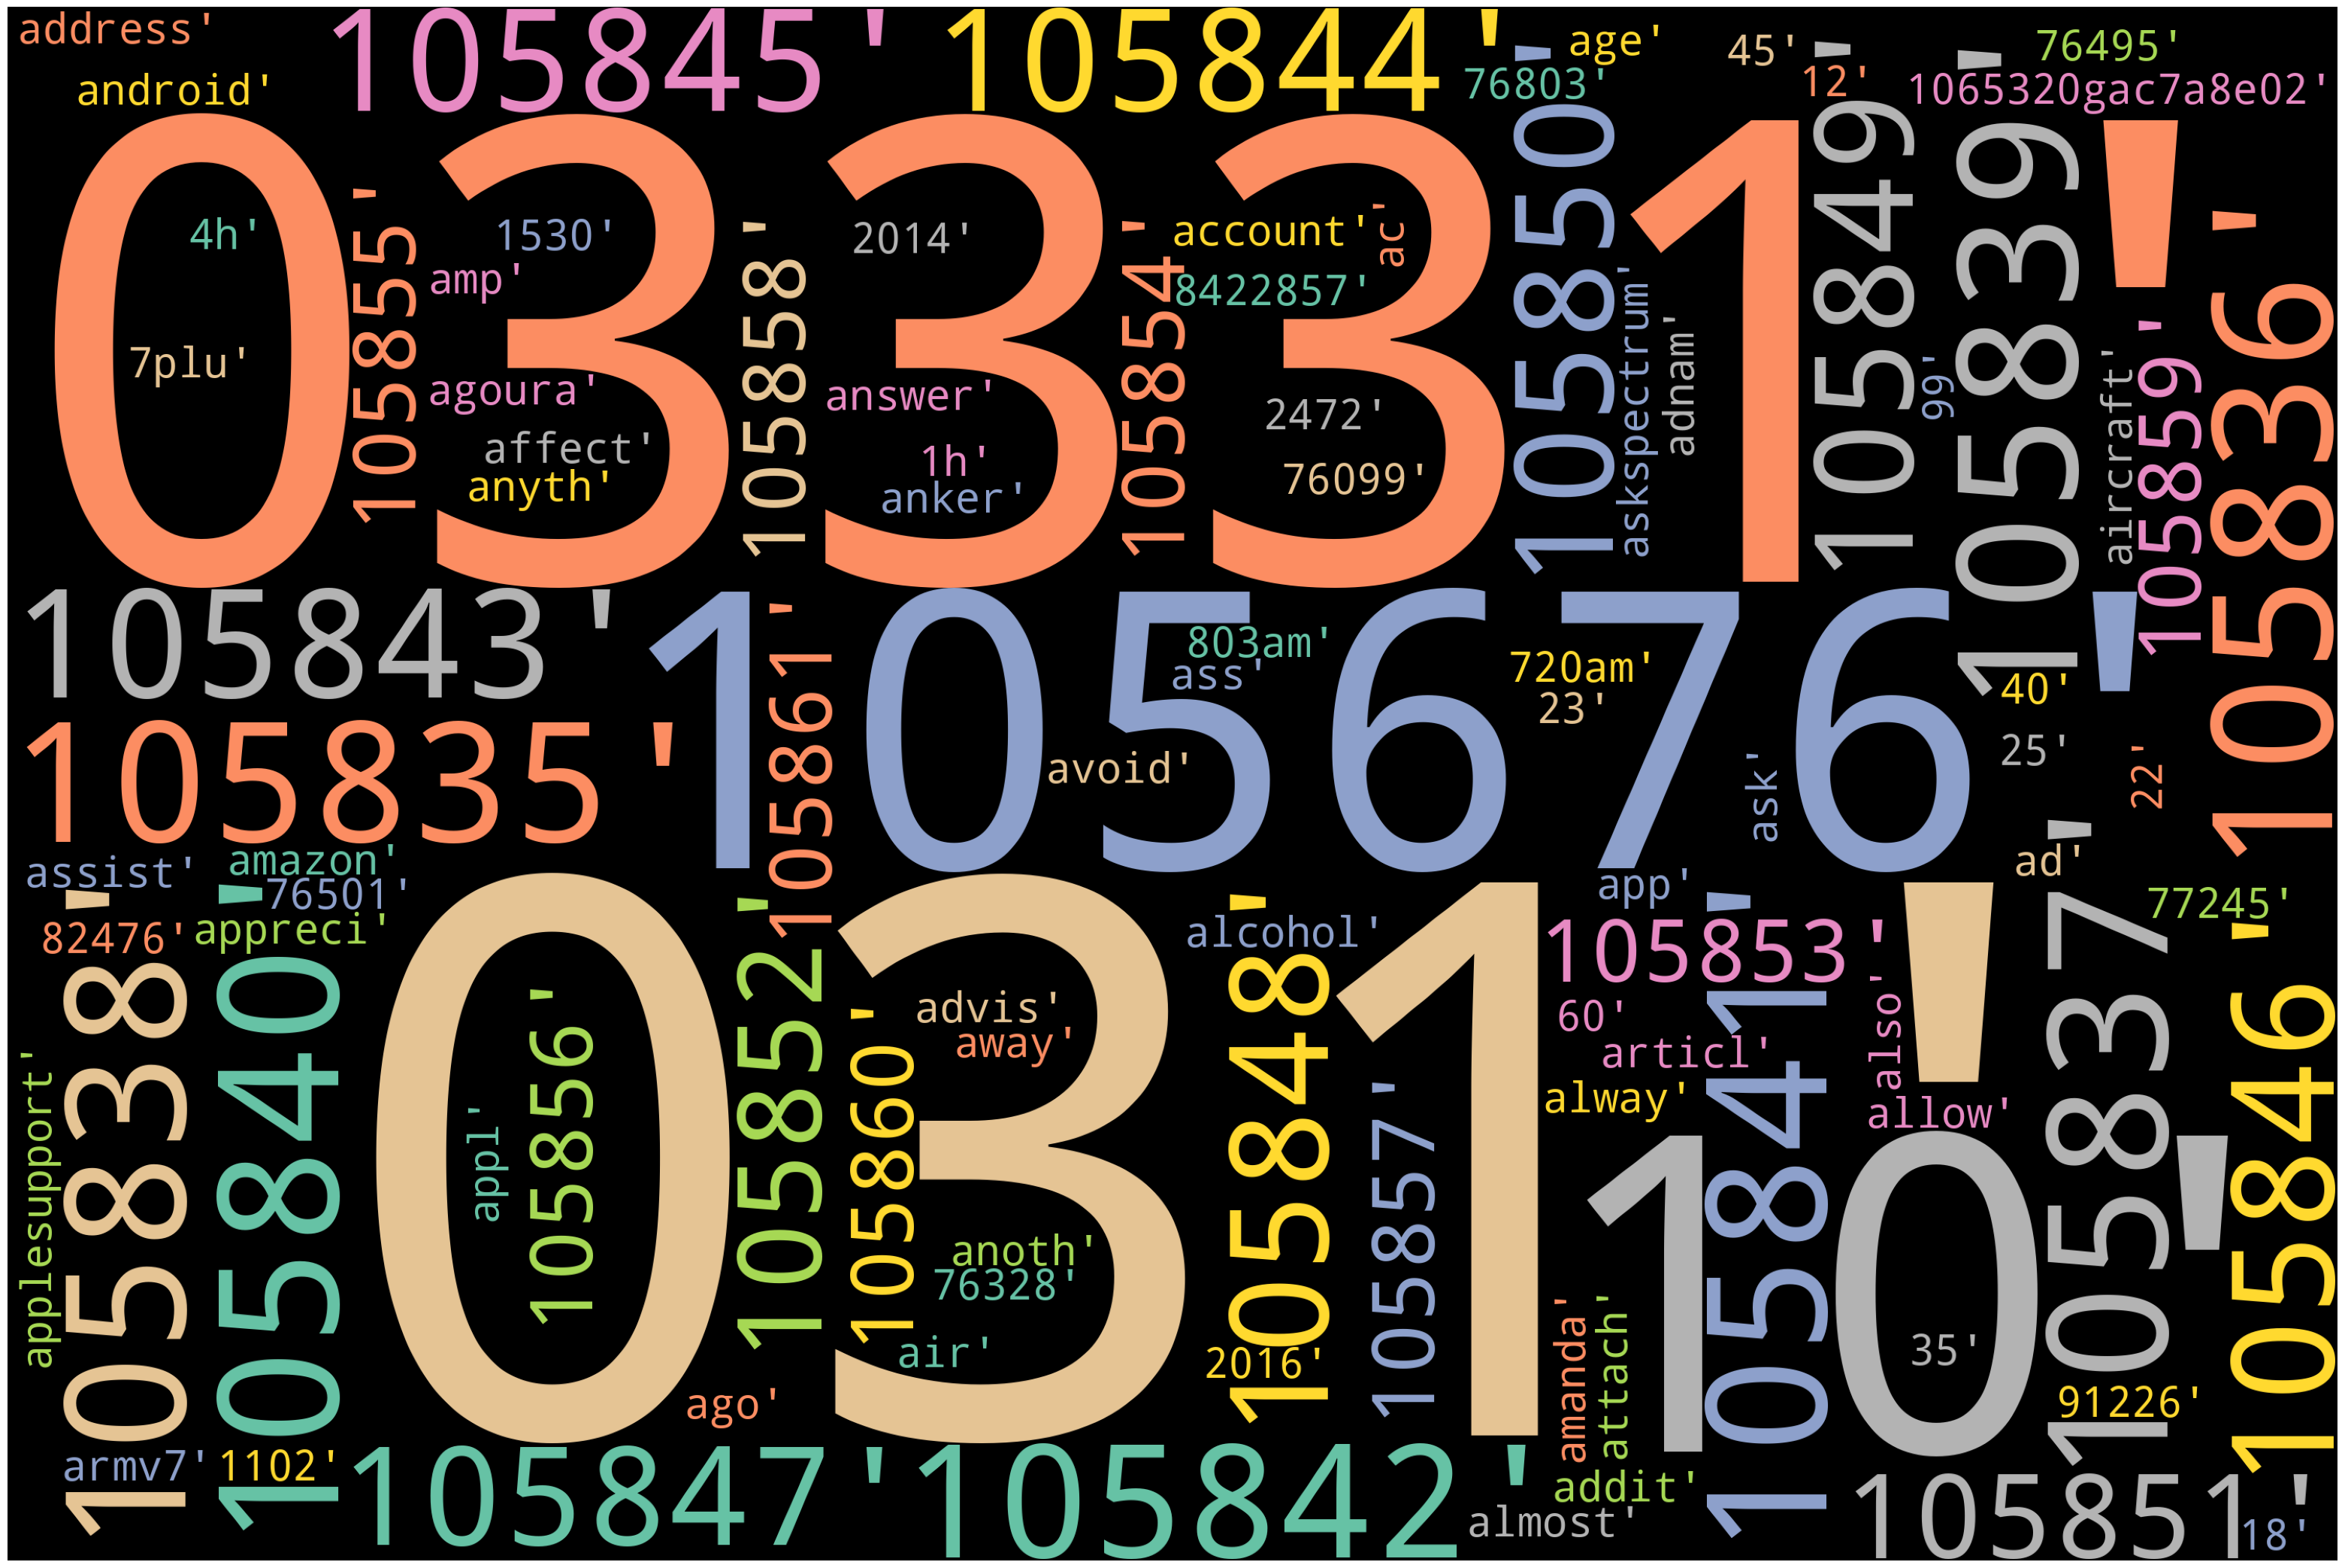

In [351]:
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(word_set)
# Plot
plot_cloud(wordcloud)